In [63]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

# Load your dataset (replace 'your_dataset.csv' with the correct path to your data)
data = pd.read_csv(r'C:\Users\Auditics Lap-\Downloads\cleaned_amazon_reviews.csv')  # Replace with your dataset path

# Handle missing values in 'text' column by removing rows with NaN values
data.dropna(subset=['cleaned_review'], inplace=True)

# Alternatively, you can fill NaN values with a placeholder text like an empty string
# data['text'].fillna('', inplace=True)

# Assuming your dataset has columns: 'text' (reviews/comments) and 'sentiment' (positive/negative)
X = data['cleaned_review']
y = data['sentiment_data']
 # Replace with the column name for sentiment labels

# Convert sentiment labels to numeric if necessary (e.g., 'positive' -> 1, 'negative' -> 0)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split dataset into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize CountVectorizer for text preprocessing
vectorizer = CountVectorizer(stop_words='english')

# Fit the vectorizer on the training data
X_train_vec = vectorizer.fit_transform(X_train)

# Handle class imbalance with SMOTE (Synthetic Minority Over-sampling Technique)
smote = SMOTE(random_state=42)
X_train_oversampling, y_train_oversampling = smote.fit_resample(X_train_vec, y_train)

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42, n_jobs=-1)

# Define the hyperparameters to search during GridSearchCV
param_grid = {
    'n_estimators': [100, 200],  # Number of trees in the forest
    'max_depth': [10, 20],  # Maximum depth of each tree
    'min_samples_split': [2, 5],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2]  # Minimum number of samples required to be at a leaf node
}

# Create GridSearchCV object for hyperparameter tuning
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)

# Fit the GridSearchCV on the oversampled training data
grid_search.fit(X_train_oversampling, y_train_oversampling)

# Print the best hyperparameters found by GridSearchCV
print("Best Parameters:", grid_search.best_params_)

# Train the Random Forest model with the best parameters from GridSearchCV
best_rf_model = grid_search.best_estimator_

# Make predictions on the test set
X_test_vec = vectorizer.transform(X_test)  # Transform the test data
y_pred = best_rf_model.predict(X_test_vec)

# Evaluate the model's performance
print('Confusion_matrix :', confusion_matrix(y_test,y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))  # Accuracy score
print("Classification Report:")
print(classification_report(y_test, y_pred))  # Precision, recall, f1-score

# Define a function to predict sentiment for new text


Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Confusion_matrix : [[ 34   0  19]
 [  5   9   8]
 [ 48  25 349]]
Accuracy: 0.7887323943661971
Classification Report:
              precision    recall  f1-score   support

           0       0.39      0.64      0.49        53
           1       0.26      0.41      0.32        22
           2       0.93      0.83      0.87       422

    accuracy                           0.79       497
   macro avg       0.53      0.63      0.56       497
weighted avg       0.84      0.79      0.81       497



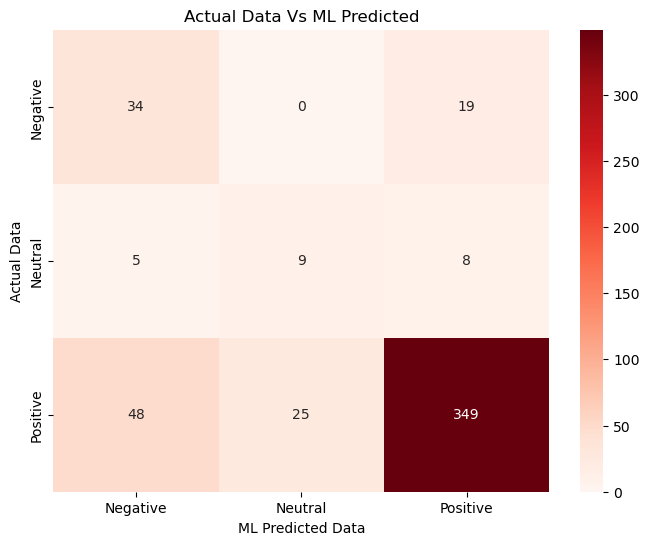

<Figure size 640x480 with 0 Axes>

In [59]:

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred are your actual and predicted labels
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', xticklabels=['Negative','Neutral', 'Positive'], yticklabels=['Negative','Neutral', 'Positive'], cbar=True)
plt.title('Actual Data Vs ML Predicted')
plt.xlabel('ML Predicted Data')
plt.ylabel('Actual Data')
plt.show()
plt.savefig(r'C:\Users\Auditics Lap-\Downloads\confusion_matrix_image.png')


In [69]:
def pred_data(text):
    processed_text = vectorizer.transform([text])  # Transform the input text using the vectorizer
    predicted = best_rf_model.predict(processed_text)  # Predict sentiment using the trained model
    return label_encoder.inverse_transform(predicted)  # Convert numeric prediction back to text label

# Example prediction
sample_text = "I love python and Machine Learning"
predicted_sentiment = pred_data(sample_text)
print(f"Predicted Sentiment for '{sample_text}':", predicted_sentiment)


Predicted Sentiment for 'I love python and Machine Learning': ['Positive']


In [73]:
import matplotlib.pyplot as plt
import numpy as np

# After oversampling
y_train_oversampling.value_counts().plot(kind='bar')
plt.show()


AttributeError: 'numpy.ndarray' object has no attribute 'value_counts'